# One Shot Detection with NIDS-Net

Example images are from https://arxiv.org/abs/2310.19257

1.   Installation
2.   Get the template embeddings
3.   Get the proposal embeddings
4.   Matching and get the final result




## Installation

In [1]:
!git clone https://github.com/YoungSean/NIDS-Net.git

Cloning into 'NIDS-Net'...
remote: Enumerating objects: 559, done.
remote: Counting objects: 100% (110/110), done.
remote: Compressing objects: 100% (68/68), done.
remote: Total 559 (delta 63), reused 82 (delta 42), pack-reused 449
Receiving objects: 100% (559/559), 103.94 MiB | 14.80 MiB/s, done.
Resolving deltas: 100% (241/241), done.


In [2]:
%cd NIDS-Net/

/content/NIDS-Net


In [3]:
!pip install -r requirements.txt

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [4]:
!python setup.py install

I0813 06:28:43.440610 138191627244160 dist.py:986] running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
I0813 06:28:43.496271 138191627244160 dist.py:986] running build
I0813 06:28:43.496407 138191627244160 dist.py:986] running build_py
I0813 06:28:43.517691 138191627244160 dir_util.py:70] creating build
I0813 06:28:43.517881 138191627244160 dir_util.py:70] creating build/lib
I0813 06:28:43.518014 138191627244160 dir_util.py:70] creating build/lib/data

In [ ]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-zkcba1qz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-zkcba1qz
  Resolved https://github.com/facebookresearch/detectron2.git to commit bcfd464d0c810f0442d91a349c0f6df945467143
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 37.6 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp31

In [ ]:
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
!mkdir ckpts/sam_weights
!mv sam_vit_h_4b8939.pth ckpts/sam_weights

--2024-08-13 06:35:36--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.35.18.102, 13.35.18.103, 13.35.18.15, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.35.18.102|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G   225MB/s    in 18s     

2024-08-13 06:35:54 (138 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



## Set Up Grounded-SAM

In [ ]:
import time
import argparse
import cv2
import glob
import json
import logging
import os
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from typing import List, Optional

import torch
from torch import nn
import torch.backends.cudnn as cudnn
from torchvision import transforms as pth_transforms
import torchvision.transforms as T

sys.path.append("../detectron2")
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.data.datasets import register_coco_instances


# sys.path.append("../dinov2-main")
# from dinov2.eval.setup import get_args_parser as get_setup_args_parser


sys.path.append(".")
from utils.visualizer import ColorMode, Visualizer
from utils.instance_det_dataset import RealWorldDataset
from utils.inference_utils import compute_similarity, stableMatching, get_bbox_masks_from_gdino_sam, \
    get_object_proposal, getColor, create_instances, nms, apply_nms, get_features
from tqdm import trange
from adapter import ModifiedClipAdapter, WeightAdapter
from utils.img_utils import get_masked_image
from IPython.display import display

Note: we set the **threshold** for GroundingDINO here!!!

In [ ]:
from absl import app, logging
from PIL import Image as PILImg

from robokit.ObjDetection import GroundingDINOObjectPredictor, SegmentAnythingPredictor

logging.info("Initialize object detectors")
gdino = GroundingDINOObjectPredictor(use_vitb=False, threshold=0.5) # we set threshold for GroundingDINO here!!!
SAM = SegmentAnythingPredictor(vit_model="vit_h")

final text_encoder_type: bert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

groundingdino_swint_ogc.pth:   0%|          | 0.00/694M [00:00<?, ?B/s]

Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swint_ogc.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


In [ ]:
from utils.img_utils import masks_to_bboxes
from robokit.utils import annotate, overlay_masks

def get_bbox_masks_from_gdino_sam(image_path, gdino, SAM, text_prompt='objects', visualize=False):
    """
    Get bounding boxes and masks from gdino and sam
    @param image_path: the image path
    @param gdino: the model of grounding dino
    @param SAM: segment anything model or its variants
    @param text_prompt: generally 'objects' for object detection of noval objects
    @param visualize: if True, visualize the result
    @return: the bounding boxes and masks of the objects.
    Bounding boxes are in the format of [x_min, y_min, x_max, y_max] and shape of (N, 4).
    Masks are in the format of (N, H, W) and the value is True for object and False for background.
    They are both in the format of torch.tensor.
    """
    # logging.info("Open the image and convert to RGB format")
    image_pil = PILImg.open(image_path).convert("RGB")

    logging.info("GDINO: Predict bounding boxes, phrases, and confidence scores")
    with torch.no_grad():
        bboxes, phrases, gdino_conf = gdino.predict(image_pil, text_prompt)

        # logging.info("GDINO post processing")
        w, h = image_pil.size  # Get image width and height
        # Scale bounding boxes to match the original image size
        image_pil_bboxes = gdino.bbox_to_scaled_xyxy(bboxes, w, h)

        logging.info("SAM prediction")
        image_pil_bboxes, masks = SAM.predict(image_pil, image_pil_bboxes)
    masks = masks.squeeze(1)
    accurate_bboxs = masks_to_bboxes(masks)  # get the accurate bounding boxes from the masks
    accurate_bboxs = torch.tensor(accurate_bboxs)
    bbox_annotated_pil = None
    if visualize:
        logging.info("Annotate the scaled image with bounding boxes, confidence scores, and labels, and display")
        bbox_annotated_pil = annotate(overlay_masks(image_pil, masks), accurate_bboxs, gdino_conf, phrases)
        #bbox_annotated_pil.show()
        display(bbox_annotated_pil)
    return accurate_bboxs, masks, bbox_annotated_pil

## Deal with template image

We provide two ways to generate the mask for the template image. You can choose any one as you like:
1. Use grounded-SAM with a text prompt
2. Use SAM with bounding box prompt

In [ ]:
# Reference: https://github.com/facebookresearch/segment-anything
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)

def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

In [ ]:
template_img = 'imgs/005.jpg'
image = cv2.imread(template_img)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [ ]:
image.shape

(3456, 3456, 3)

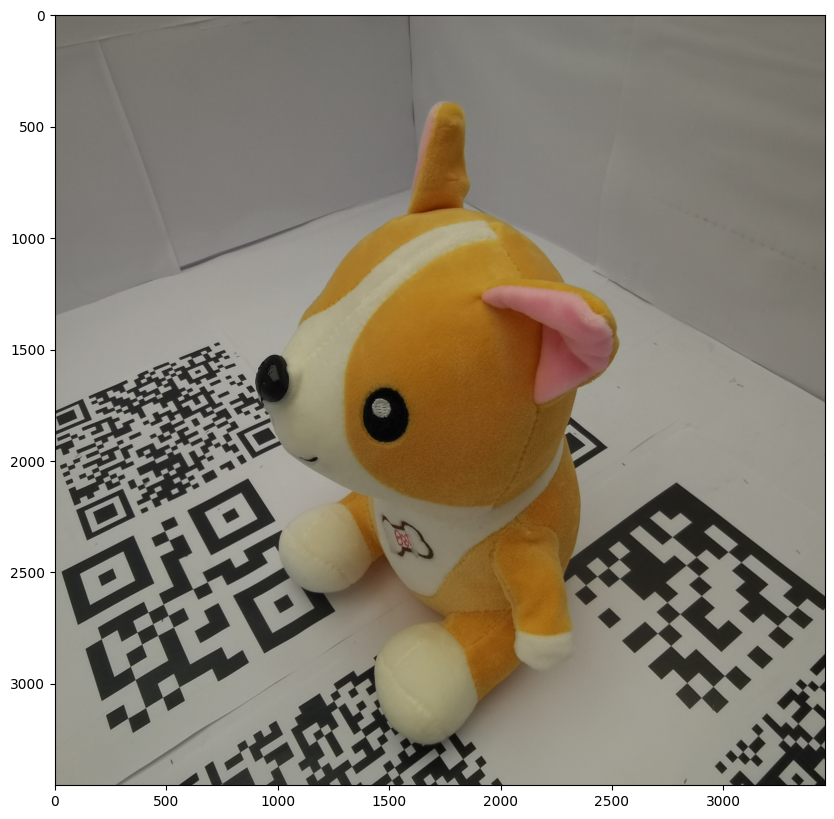

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)
plt.axis('on')
plt.show()

### 1 Get mask with Grounded-SAM

Using text prompt "toy" to get the bounding box and mask of the template instance

In [ ]:
accurate_bboxs, masks, vis_img = get_bbox_masks_from_gdino_sam(template_img, gdino, SAM, text_prompt='toy', visualize=True)

ERROR:root:Error during annotation: BoxAnnotator.annotate() got an unexpected keyword argument 'labels'


TypeError: BoxAnnotator.annotate() got an unexpected keyword argument 'labels'

In [ ]:
accurate_bboxs.shape

In [ ]:
template_box = accurate_bboxs[0].cpu().numpy()
template_mask = masks[0].cpu().numpy()

In [ ]:
template_mask = np.expand_dims(template_mask, axis=0)


plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(template_mask, plt.gca())
show_box(template_box, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
template_mask.shape

In [ ]:
template_box

### 2 Get mask with SAM
Reference: https://github.com/facebookresearch/segment-anything

In [ ]:
# image: The input image as a numpy array.
# prompt_bboxes: Optional prompt bounding boxes as a list of lists of integers [x_min, y_min, x_max, y_max].
prompt_bboxes = [903,  394, 2526, 3269]
input_boxes, masks = SAM.predict(image, prompt_bboxes)

In [ ]:
input_box = input_boxes.cpu().numpy()
masks = masks.cpu().numpy()

In [ ]:
masks.shape

In [ ]:
template_box = input_box
template_mask = masks[0]

plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(template_mask, plt.gca())
show_box(template_box, plt.gca())
plt.axis('off')
plt.show()

In [ ]:
template_mask.shape

### Get template embedding

In [ ]:
!git clone https://github.com/mhamilton723/FeatUp
import os
os.chdir("FeatUp/")
!pip install -e .
os.chdir("..")

In [ ]:
from utils.inference_utils import get_features, get_features_via_batch_tensor, resize_and_pad, \
    get_weighted_FFA_features
from utils.inference_utils import compute_similarity
from utils.instance_det_dataset import InstanceDataset
import numpy as np
import torch
from PIL import Image
import os
import json
from tqdm import trange, tqdm
from matplotlib import colors
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from utils.instance_det_dataset import BOPDataset
import time
import math
from utils.inference_utils import FFA_preprocess, get_foreground_mask
# use dino v2 to extract features
encoder = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14_reg') # define the DINOv2 version
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoder.to(device)
encoder.eval()

img_size = 448

def get_FFA_feature(img_path, mask, encoder, img_size=448):
    """get FFA for a pair of rgb and mask images"""
    # mask_path = img_path.replace('images', 'masks').replace('.jpg', '.png')
    # mask = Image.open(mask_path)
    # mask = mask.convert('L')

    with open(img_path, 'rb') as f:
        img = Image.open(f)
        img = img.convert('RGB')

    w, h = img.size

    if (img_size is not None) and (min(w, h) > img_size):
        img.thumbnail((img_size, img_size), Image.LANCZOS)
        mask.thumbnail((img_size, img_size), Image.BILINEAR)

        # mask.show()
    else:
        new_w = math.ceil(w / 14) * 14
        new_h = math.ceil(h / 14) * 14
        img = img.resize((new_w, new_h), Image.LANCZOS)
    # mask = mask.resize((16 , 16), Image.BILINEAR)
    img.show()
    mask.show()

    with torch.no_grad():
        preprocessed_imgs = FFA_preprocess([img], img_size).to(device)
        mask_size = img_size // 14
        masks = get_foreground_mask([mask], mask_size).to(device)
        emb = encoder.forward_features(preprocessed_imgs)

        grid = emb["x_norm_patchtokens"].view(1, mask_size, mask_size, -1)
        avg_feature = (grid * masks.permute(0, 2, 3, 1)).sum(dim=(1, 2)) / masks.sum(dim=(1, 2, 3)).unsqueeze(-1)

        return avg_feature

#### Show the mask image

In [ ]:
mask_img = (template_mask).astype(np.uint8) * 255  # Convert False to 0, True to 255
mask_img = Image.fromarray(mask_img.squeeze(), 'L')  # 'L' for (8-bit pixels, black and white)
display(mask_img)

#### Get the template embedding

In [ ]:
avg_feature = get_FFA_feature(template_img, mask_img, encoder)

In [ ]:
avg_feature.shape

In [ ]:
object_features = nn.functional.normalize(avg_feature, dim=1, p=2)

## Get the query embeddings

In [ ]:
logging.info("Open the image and convert to RGB format")
image_path = "test_data/test_1/test_002.jpg"
image_pil = PILImg.open(image_path).convert("RGB")

Get the proposals using the text prompt "toy"

In [ ]:
accurate_bboxs, masks, vis_img = get_bbox_masks_from_gdino_sam(image_path, gdino, SAM, text_prompt='toy', visualize=True)

Get the proposal embeddings

In [ ]:
def get_object_proposal(image_path, bboxs, masks, tag="mask", ratio=1.0, output_dir='object_proposals', save_segm=False, save_proposal=False):
    """
    Get object proposals from the image according to the bounding boxes and masks.

    @param image_path:
    @param bboxs: numpy array, the bounding boxes of the objects [N, 4]
    @param masks: Boolean numpy array of shape [N, H, W], True for object and False for background
    @param tag: use mask or bbox to crop the object
    @param ratio: ratio to resize the image
    @param save_rois: if True, save the cropped object proposals
    @param output_dir: the folder to save the cropped object proposals
    @return: the cropped object proposals and the object proposals information
    """
    raw_image = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    image_height, image_width = raw_image.shape[:-1]
    scene_name = os.path.basename(image_path).split('.')[0]
    sel_rois = []
    rois = []
    cropped_masks = []
    cropped_imgs = []
    # ratio = 0.25
    if ratio != 1.0:
        scene_image = cv2.resize(raw_image, (int(raw_image.shape[1] * ratio), int(raw_image.shape[0] * ratio)),
                               cv2.INTER_LINEAR)
    else:
        scene_image = raw_image
    for ind in range(len(masks)):
        # bbox
        x0 = int(bboxs[ind][0])
        y0 = int(bboxs[ind][1])
        x1 = int(bboxs[ind][2])
        y1 = int(bboxs[ind][3])

        # load mask
        mask = masks[ind].squeeze(0).cpu().numpy()
        # Assuming `mask` is your boolean numpy array with shape (H, W)
        rle = None
        if save_segm:
            rle = maskUtils.encode(np.asfortranarray(mask.astype(np.uint8)))
            rle['counts'] = rle['counts'].decode('ascii')  # If saving to JSON, ensure counts is a string
        cropped_mask = mask[y0:y1, x0:x1]
        cropped_mask = Image.fromarray(cropped_mask.astype(np.uint8) * 255)
        cropped_masks.append(cropped_mask)
        # show mask
        cropped_img = raw_image[y0:y1, x0:x1]
        cropped_img = Image.fromarray(cropped_img)

        cropped_imgs.append(cropped_img)

        # save bbox
        sel_roi = dict()
        sel_roi['roi_id'] = int(ind)
        sel_roi['mask'] = mask
        #sel_roi['image_id'] = int(scene_name.split('_')[-1])
        sel_roi['bbox'] = [int(x0 * ratio), int(y0 * ratio), int((x1 - x0) * ratio), int((y1 - y0) * ratio)]
        sel_roi['area'] = np.count_nonzero(mask)
        sel_roi['roi_dir'] = os.path.join(output_dir, scene_name, scene_name + '_' + str(ind).zfill(3) + '.png')
        sel_roi['image_dir'] = image_path
        sel_roi['image_width'] = scene_image.shape[1]
        sel_roi['image_height'] = scene_image.shape[0]
        if save_segm:
            sel_roi['segmentation'] = rle  # Add RLE segmentation
        sel_roi['scale'] = int(1 / ratio)
        sel_rois.append(sel_roi)
    if save_proposal:
        with open(os.path.join(output_dir, 'proposals_on_' + scene_name + '.json'), 'w') as f:
            json.dump(sel_rois, f)
    return rois, sel_rois, cropped_imgs, cropped_masks

In [ ]:
#mask = masks.cpu().numpy()
#accurate_bboxs = accurate_bboxs.cpu().numpy()
rois, sel_rois, cropped_imgs, cropped_masks = get_object_proposal(image_path, accurate_bboxs, masks, ratio=1.0, output_dir=".", save_proposal=False)
scene_features = []
for i in trange(len(cropped_imgs)):
    img = cropped_imgs[i]
    mask = cropped_masks[i]
    ffa_feature= get_features([img], [mask], encoder, device=device, img_size=448)
    scene_features.append(ffa_feature)
scene_features = torch.cat(scene_features, dim=0)
scene_features = nn.functional.normalize(scene_features, dim=1, p=2)

In [ ]:
scene_features.shape

## Matching

Compute the cosine similarity between template embeddings and proposal embeddings

In [ ]:
sim_mat = compute_similarity(object_features, scene_features)

In [ ]:
sim_mat = sim_mat.squeeze(-1)

In [ ]:
sim_mat

Find the index of the most similar proposal

In [ ]:
max_ins_sim, initial_result = torch.max(sim_mat, dim=0)

In [ ]:
initial_result

In [ ]:
result_id = initial_result.item()

In [ ]:
sel_rois[result_id]

In [ ]:
bbox = sel_rois[result_id]['bbox']  # [int(x0 * ratio), int(y0 * ratio), int((x1 - x0) * ratio), int((y1 - y0) * ratio)]

x0 = int(bbox[0])
y0 = int(bbox[1])
x1 = x0 + int(bbox[2])
y1 = y0 + int(bbox[3])
bbox = [x0, y0, x1, y1]

In [ ]:
output_mask = sel_rois[result_id]['mask']

Visualize the bounding box and mask of the target instance

In [ ]:
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(output_mask, plt.gca())
show_box(bbox, plt.gca())
plt.axis('off')
plt.show()